# Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2019)

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.metrics import r2_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve


import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
    
import matplotlib.pyplot as plt
%matplotlib inline

# Data regression

In [2]:
X, y = make_regression(n_samples=20000, n_features=150, noise=15, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision Tree Regressor

0.6039922370965223

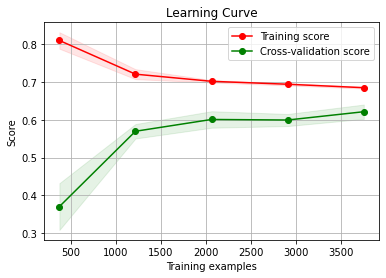

In [3]:
model = DecisionTreeRegressor(random_state=20, max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=4, random_state=20, shuffle=True)

r2_score(y_test, y_pred)

# Random Forest Regressor

In [ ]:
model = RandomForestRegressor(random_state=20, n_estimators=50, max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=4, random_state=20, shuffle=True)

r2_score(y_test, y_pred)

# XGBRegressor

0.9299307714069879

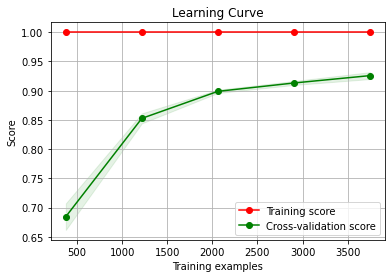

In [8]:
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=50, random_state=20)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=4, random_state=20, shuffle=True)

r2_score(y_test, y_pred)

# LGBMRegressor

In [ ]:
model = lgb.LGBMRegressor(n_estimators=50, random_state=20, max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=4, random_state=20, shuffle=True)

r2_score(y_test, y_pred)

# Cat Boost Regressor

In [ ]:
model = ctb.CatBoostRegressor(n_estimators=50, depth=6, random_state=20, verbose=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=4, random_state=20, shuffle=True)

r2_score(y_test, y_pred)

# Data classification

In [2]:
X, y = make_classification(n_samples=20000, n_features=150, hypercube=False, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Created 'run_model' for test tree

In [14]:
def run_model (model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plot_learning_curve(model, X, y, cv=4, random_state=20, shuffle=True, scoring='f1')

    print(f1_score(y_test, y_pred))

# Decision Tree Classifier

0.768720544597661


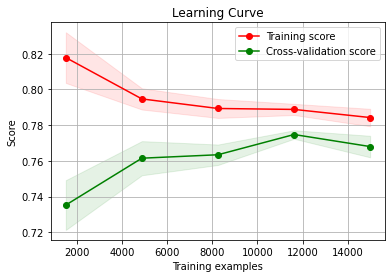

In [16]:
model_DecisionTreeClassifier= run_model(DecisionTreeClassifier(random_state=20, max_depth=5))

# Random Forest Classifier

0.7245860779775681


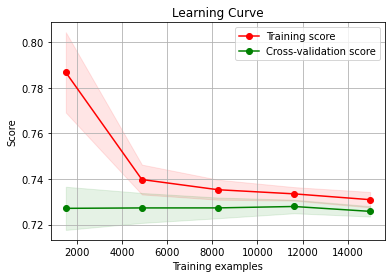

In [17]:
model_RandomForestClassifier = run_model(RandomForestClassifier(random_state=20, n_estimators=50 ,max_depth=5))

# XGBoost Classifier

0.7593637762955362


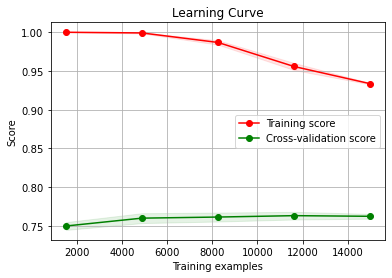

In [18]:
model_XGBoostClassifier = run_model(xgb.XGBClassifier(random_state=20, n_estimators=50))

# LGBM Classifier

0.7783540802213003


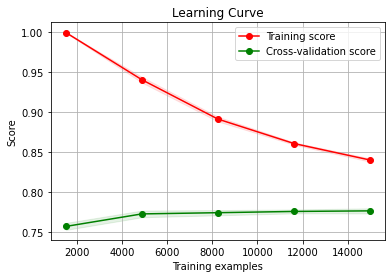

In [19]:
model_LGBMClassifier = run_model(lgb.LGBMClassifier(n_estimators=50, random_state=20))